In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
df = pd.read_csv('C:/Users/mishr/OneDrive/Desktop/Data_Science/ML_Assignments/machine-learning-ex1/ex1/ex1data1.csv')
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [157]:
x = df['Population']
y = df['Profit']
xmax = max(x)
ymax = max(y)
ymin = min(y)

In [158]:
print('xmax =',xmax)
print('(ymin,ymax)=',ymin,ymax)

xmax = 22.203000000000003
(ymin,ymax)= -2.6807 24.147


Text(0.5, 1.0, 'Profit of food truck in cities')

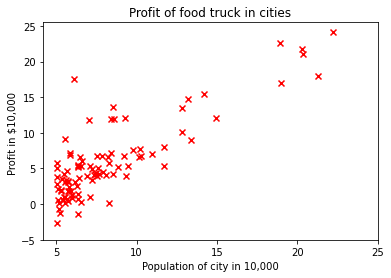

In [159]:
plt.scatter(x,y,marker='x',color='r')
plt.xticks(np.arange(5,30,5))
plt.yticks(np.arange(-5,30,5))
plt.xlabel('Population of city in 10,000')
plt.ylabel('Profit in $10,000 ')
plt.title('Profit of food truck in cities')

In [160]:
(m,n)=df.shape
print(m,n)

97 2


Cost Function

In [161]:
def computeCost(X,Y,theta):
    m = len(Y)
    prediction  = X.dot(theta)
    sqerror = (prediction-Y)**2
    return 1/(2*m)*np.sum(sqerror)

In [162]:
mydata = df.values
m = mydata[:,0].size
x = np.append(np.ones((m,1)),mydata[:,0].reshape(m,1),axis=1)
y = mydata[:,1].reshape(m,1)
theta = np.zeros((2,1))

computeCost(x,y,theta)

32.072733877455676

Gradient descent

In [163]:
def gradientDescent(X,Y,alpha,theta,num_iters):
    m=len(Y)
    J_history =[]
    for i in range(num_iters):
        predictions = np.dot(X,theta)
        error = predictions -Y
        temp = np.dot(X.transpose(),error)
        descent = alpha*1/m*temp
        theta-=descent
        J_history.append(computeCost(X,Y,theta))    
    return theta,J_history

In [164]:
theta,J_history = gradientDescent(x,y,0.01,theta,1500)
print("h(x1) = " + str(round(theta[0][0],2)) + " + " + str(round(theta[1][0],2)) +"x1")

h(x1) = -3.63 + 1.17x1


Text(0.5, 1.0, 'Cost function using Gradient Descent')

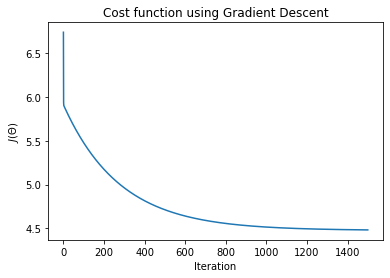

In [165]:

plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit of food truck')

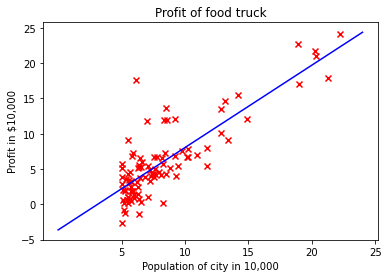

In [166]:
#plotting the prediction line
plt.scatter(df['Population'],df['Profit'],marker='x',color='r')
x_value = [x for x in range(25)]
y_value = [y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color='b')
plt.xticks(np.arange(5,30,5))
plt.yticks(np.arange(-5,30,5))
plt.xlabel("Population of city in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Profit of food truck")

Multivariate Linear Regression

In [167]:
df2 = pd.read_csv('C:/Users/mishr/Downloads/ex1data2.csv')
df2

,size of house,# bedroom,price of house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [168]:
df2.describe()

,size of house,# bedroom,price of house
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


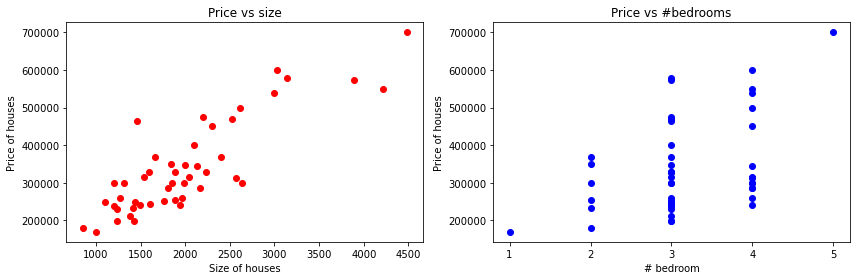

In [169]:
fig,axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(df2['size of house'],df2['price of house'],color='r')
axes[0].set_xlabel('Size of houses')
axes[0].set_ylabel('Price of houses')
axes[0].set_title('Price vs size')
axes[1].scatter(df2['# bedroom'],df2['price of house'],color='b')
axes[1].set_xlabel('# bedroom')
axes[1].set_ylabel('Price of houses')
axes[1].set_title('Price vs #bedrooms')
axes[1].set_xticks(np.arange(1,6,1))
plt.tight_layout()

Feature Normalization

In [170]:
def featureNorm(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm,mean,std

In [171]:
data2 = df2.values

In [172]:
m2  = len(data2[:,-1])
X2 = data2[:,0:2].reshape(m2,2)
X2,mean_X2,std_X2 = featureNorm(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2 = data2[:,-1].reshape(m2,1)
theta2 = np.zeros((3,1))

In [173]:
computeCost(X2,y2,theta2)

65591548106.45744

In [174]:
theta2,J_history2 = gradientDescent(x2,y2,0.1,theta2,400)
print("h(x2) = "+str(round(theta2[0][0],2)) + " + "+ str(round(theta2[1][0],2)) +"x1 + " + str(round(theta2[2][0],2)) + "x2" )

h(x2) = 340412.66 + 109447.8x1 + -6578.35x2


Text(0.5, 1.0, 'J vs iterations')

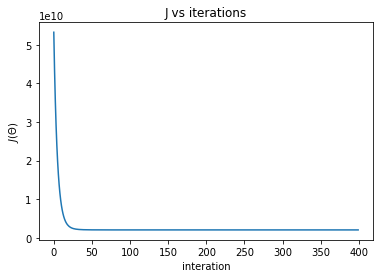

In [175]:
plt.plot(J_history2)
plt.xlabel('interation')
plt.ylabel('$J(\Theta)$')
plt.title('J vs iterations')


In [177]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [194]:
x_sample = featureNorm(np.array([1650,3]))[0]
x_sample = np.append(np.ones((1,1)),x_sample)
predict3 = predict(x_sample,theta2)
print("House price is $" + str(round(predict3)))

House price is $456439.0
